In [1]:
from rdkit import Chem

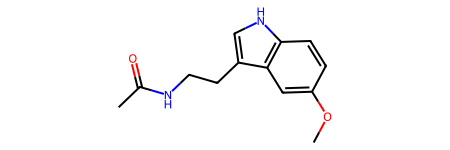

In [2]:
m = Chem.MolFromSmiles('CC(=O)NCCC1=CNc2c1cc(OC)cc2')
m

Attempting to download from: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/444294/SDF?record_type=2d
Molecule SMILES: CC1(C)[C@H]2CC[C@]1(C)C(=O)C2


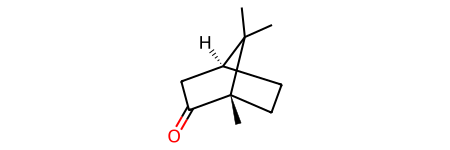

In [3]:
import requests
from io import StringIO # parsing SDF strings
from IPython.display import display # display function

# PubChem CID for (S)-Camphor
camphor_s_cid = 444294

# PubChem typically provides SDF, which is an extension of MOL
pubchem_mol_url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{camphor_s_cid}/SDF?record_type=2d' # generic url for SDF display

print(f"Attempting to download from: {pubchem_mol_url}")

# commented out code below is for validating succesful download/troubleshooting unsuccesful download
try:
    response = requests.get(pubchem_mol_url)
    response.raise_for_status() # Raises an HTTPError for bad responses (4xx or 5xx)

    s_camphor_content = response.text

    #print(f"HTTP Status Code: {response.status_code}")
    #print("\n--- Raw content received from PubChem (first 500 chars) ---")
    #print(mol_content[:500])
    #print("--- End of raw content ---\n")

    # RDKit parses SDF content.
    # for a single molecule SDF (which these PUG REST calls usually return for 2D/3D single molecule), Chem.MolFromMolBlock often works directly.
    # SDMolSupplier if you expect multiple molecules or strict SDF parsing.

    # attempt to parse as a single MOL block
    s_camphor = Chem.MolFromMolBlock(s_camphor_content)

    if s_camphor is not None:
        #print(f"RDKit successfully parsed the molecule from CID {camphor_s_cid}.")
        print(f"Molecule SMILES: {Chem.MolToSmiles(s_camphor)}") # shows the SMILES of the molecule
        # Display the molecule in Jupyter if you are in a cell
        display(s_camphor)
    else:
        #print(f"RDKit could not parse the content from CID {camphor_s_cid} (returned None).")
        print("The content might not be a valid single MOL block or has issues.")
        # if MolFromMolBlock fails, you can try parsing as an SDF file:
        # supplier = Chem.SDMolSupplier()
        # supplier.SetData(mol_content)
        # mol = supplier[0] # Get the first molecule if it exists
        # print("Attempted with SDMolSupplier and got:", mol)

except requests.exceptions.HTTPError as e:
    print(f"HTTP Error occurred: {e}")
    print(f"Response content (if available): {response.text[:500]}")
except requests.exceptions.ConnectionError as e:
    print(f"Connection Error occurred: {e}")
except requests.exceptions.Timeout as e:
    print(f"Timeout Error occurred: {e}")
except requests.exceptions.RequestException as e:
    print(f"An unexpected Request error occurred: {e}")
except Exception as e:
    print(f"An error occurred during RDKit parsing: {e}")

In [4]:
s_camphor.GetNumAtoms() # number of non-hydrogen atoms

11

In [5]:
[atom.GetSymbol() for atom in s_camphor.GetAtoms() if not atom.IsInRing()] # what non-hydrogen atoms are outside of the ring

['O', 'C', 'C', 'C']

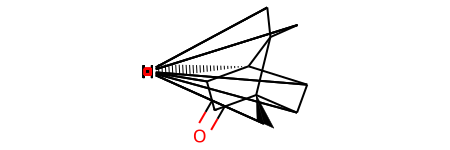

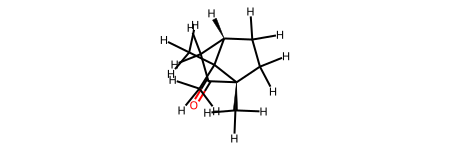

In [6]:
from rdkit.Chem import AllChem # necessary for energy minimizing calculations for hydrogen placement
s_camphor_w_hydrogens = Chem.AddHs(s_camphor) # adds hydrogens
display(s_camphor_w_hydrogens) # they're all in the same spot! because we need to use AllChem
AllChem.Compute2DCoords(s_camphor_w_hydrogens)
s_camphor_w_hydrogens # energetically optimized output

In [7]:
# comparing compounds and getting further compound info
from rdkit.Chem import Descriptors
print(f'Molecular Weight: {Descriptors.MolWt(s_camphor)}')
print(f'LogP Value: {Descriptors.MolLogP(s_camphor)}')
print(f'Number of Rotatable bonds: {Descriptors.NumRotatableBonds(s_camphor)}')

Molecular Weight: 152.237
LogP Value: 2.401700000000001
Number of Rotatable bonds: 0
